### Se importan las librerias

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from ydata_profiling import ProfileReport

# Se agrega estas lineas de codigo debido a que desde vsc no se puede visualizar los graficos, ignorar si se utiliza con jupyter notebook
#plt.switch_backend('TkAgg')
#sns.set(style="darkgrid")


### Se extrae e importan 2 df y se almacenan en variables diferentes, el cual se lee desde la wiki fandom del honkai. 

In [99]:
characterUrl = pd.read_html('https://honkai-star-rail.fandom.com/wiki/Character')
playableCharacters = characterUrl[1]
upcomingCharacters = characterUrl[2]

playableCharacters.head()

,Icon,Name,Rarity,Path,Combat Type
0,NaN,Arlan,NaN,Destruction,Lightning
1,NaN,Asta,NaN,Harmony,Fire
2,NaN,Bailu,NaN,Abundance,Lightning
3,NaN,Blade,NaN,Destruction,Wind
4,NaN,Bronya,NaN,Harmony,Wind


### Se dropean columnas no relevantes y/o vacias de los df

In [100]:
playableCharacters.drop(columns=['Icon', 'Rarity'], inplace=True)
upcomingCharacters.drop(columns=['Icon', 'Rarity'], inplace=True)
playableCharacters.head()

,Name,Path,Combat Type
0,Arlan,Destruction,Lightning
1,Asta,Harmony,Fire
2,Bailu,Abundance,Lightning
3,Blade,Destruction,Wind
4,Bronya,Harmony,Wind


In [101]:
upcomingCharacters.head()

,Name,Path,Combat Type
0,Argenti,Erudition,Physical
1,Dr. Ratio,The Hunt,Imaginary
2,Hanya,Harmony,Physical
3,Ruan Mei,Harmony,Ice
4,Xueyi,Destruction,Quantum


### Se modifica el codigo aca para agregar 1 columna a cada df, para poder diferenciar si son jugables o no actualmente para un posterior analisis

In [102]:
playableCharacters['Status'] = 'Playable'
upcomingCharacters['Status'] = 'Upcoming'

In [103]:
upcomingCharacters.head()

,Name,Path,Combat Type,Status
0,Argenti,Erudition,Physical,Upcoming
1,Dr. Ratio,The Hunt,Imaginary,Upcoming
2,Hanya,Harmony,Physical,Upcoming
3,Ruan Mei,Harmony,Ice,Upcoming
4,Xueyi,Destruction,Quantum,Upcoming


In [104]:
playableCharacters.head()

,Name,Path,Combat Type,Status
0,Arlan,Destruction,Lightning,Playable
1,Asta,Harmony,Fire,Playable
2,Bailu,Abundance,Lightning,Playable
3,Blade,Destruction,Wind,Playable
4,Bronya,Harmony,Wind,Playable


### Se unen los df para tener un consolidado con los personajes jugables y los proximos

In [105]:
characters_df = pd.concat([playableCharacters, upcomingCharacters], ignore_index=False)

In [106]:
characters_df

,Name,Path,Combat Type,Status
0,Arlan,Destruction,Lightning,Playable
1,Asta,Harmony,Fire,Playable
2,Bailu,Abundance,Lightning,Playable
3,Blade,Destruction,Wind,Playable
4,Bronya,Harmony,Wind,Playable
5,Clara,Destruction,Physical,Playable
6,Dan Heng,The Hunt,Wind,Playable
7,Dan Heng • Imbibitor Lunae,Destruction,Imaginary,Playable
8,Fu Xuan,Preservation,Quantum,Playable
9,Gepard,Preservation,Ice,Playable


In [107]:
characters_df.reset_index(drop=True, inplace=False)

,Name,Path,Combat Type,Status
0,Arlan,Destruction,Lightning,Playable
1,Asta,Harmony,Fire,Playable
2,Bailu,Abundance,Lightning,Playable
3,Blade,Destruction,Wind,Playable
4,Bronya,Harmony,Wind,Playable
5,Clara,Destruction,Physical,Playable
6,Dan Heng,The Hunt,Wind,Playable
7,Dan Heng • Imbibitor Lunae,Destruction,Imaginary,Playable
8,Fu Xuan,Preservation,Quantum,Playable
9,Gepard,Preservation,Ice,Playable


In [108]:
characters_df

,Name,Path,Combat Type,Status
0,Arlan,Destruction,Lightning,Playable
1,Asta,Harmony,Fire,Playable
2,Bailu,Abundance,Lightning,Playable
3,Blade,Destruction,Wind,Playable
4,Bronya,Harmony,Wind,Playable
5,Clara,Destruction,Physical,Playable
6,Dan Heng,The Hunt,Wind,Playable
7,Dan Heng • Imbibitor Lunae,Destruction,Imaginary,Playable
8,Fu Xuan,Preservation,Quantum,Playable
9,Gepard,Preservation,Ice,Playable


### Se extrae mas informacion desde diferentes databases links para poder tener mas informacion relevante. En este caso se traen las estadisticas bases de cada personaje

In [109]:
statsUrl = pd.read_html('https://gamewith.net/honkai-starrail/article/show/38646')
statsCharacters = statsUrl[1]
statsCharacters.rename(columns={'Character': 'Name'}, inplace=True)
statsCharacters.head()

,Name,HP,ATK,DEF,SPD
0,Blade,1358,543,485,97
1,Luocha,1280,756,363,101
2,Yukong,917,599,374,107
3,Silver Wolf,1047,819,460,107
4,Jing Yuan,1164,698,485,99


### Se mergean los datos nuevos con el dataframe anterior

In [110]:
characters_df = pd.merge(characters_df, statsCharacters, on='Name')
characters_df.sample(5)

,Name,Path,Combat Type,Status,HP,ATK,DEF,SPD
13,March 7th,Preservation,Ice,Playable,1058,511,573,101
14,Natasha,Abundance,Physical,Playable,1164,476,507,98
6,Dan Heng,The Hunt,Wind,Playable,882,546,396,110
17,Sampo,Nihility,Wind,Playable,1023,617,396,102
11,Jing Yuan,Erudition,Lightning,Playable,1164,698,485,99


In [111]:
characters_df.describe()

,HP,ATK,DEF,SPD
count,26.000000,26.000000,26.000000,26.000000
mean,1091.038462,612.923077,444.192308,101.961538
std,169.899613,86.456890,74.813913,6.089209
min,846.000000,476.000000,330.000000,90.000000
25%,936.250000,546.000000,396.000000,98.000000
50%,1047.000000,599.000000,438.500000,101.500000
75%,1230.500000,652.000000,485.000000,106.750000
max,1397.000000,819.000000,654.000000,115.000000


In [112]:
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         26 non-null     object
 1   Path         26 non-null     object
 2   Combat Type  26 non-null     object
 3   Status       26 non-null     object
 4   HP           26 non-null     int64 
 5   ATK          26 non-null     int64 
 6   DEF          26 non-null     int64 
 7   SPD          26 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.8+ KB


Se utiliza la libreria de ydata para obtener profile report, pero al parecer tiene varios bugs desde jupyter (esto no sucede desde vsc)

In [113]:
#profileData = ProfileReport(characters_df, title='Honkai Impact 3rd Characters Profile Report', explorative=True)
#profileData.to_file('HonkaiImpact3rdCharactersProfileReport.html')

# Arrancan las visualizaciones de datos para entender mas el dataset

<AxesSubplot:xlabel='Path', ylabel='count'>

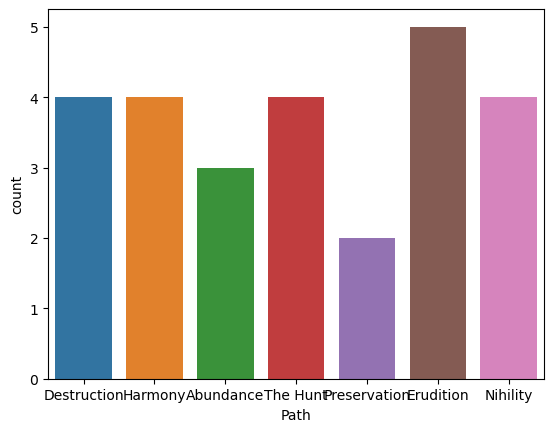

In [114]:
sns.countplot(x='Path',
            data=characters_df)

Se observa la distribucion de los personajes segun su Path

<AxesSubplot:xlabel='Combat Type', ylabel='count'>

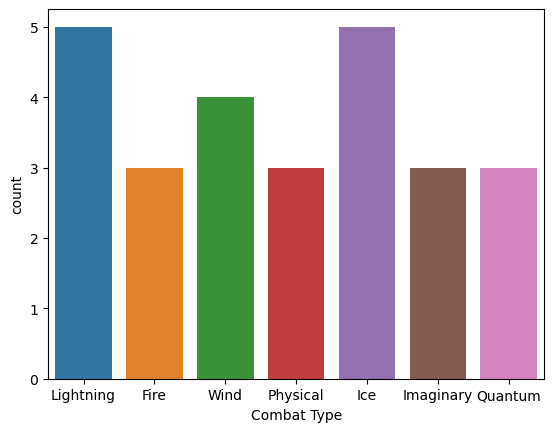

In [115]:
sns.countplot(x='Combat Type',
            data=characters_df)

### Se realizan varios scatterplots para ver si existe alguna relacion entre los stats de los personajes

<AxesSubplot:xlabel='HP', ylabel='SPD'>

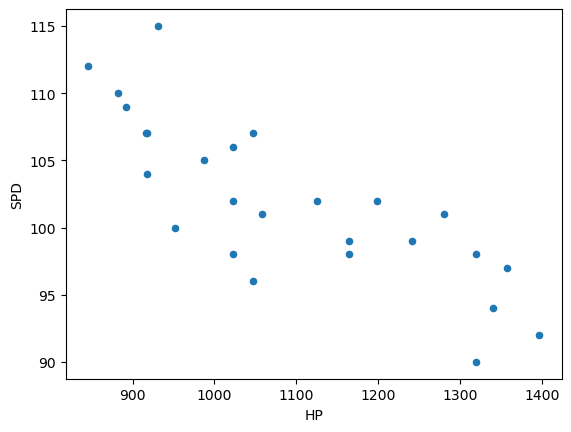

In [116]:
characters_df.plot.scatter(x='HP', y='SPD')

<AxesSubplot:xlabel='HP', ylabel='DEF'>

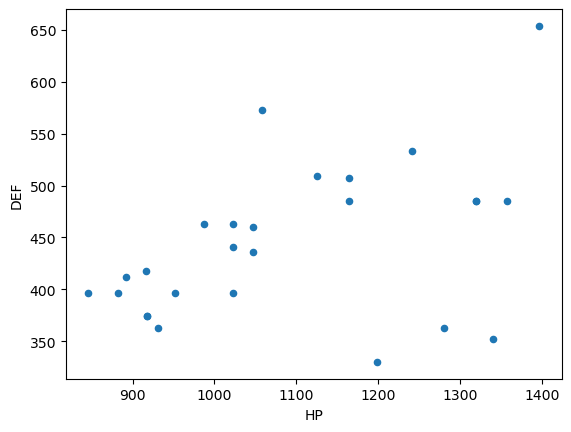

In [117]:
characters_df.plot.scatter(x='HP', y='DEF')

<AxesSubplot:xlabel='ATK', ylabel='SPD'>

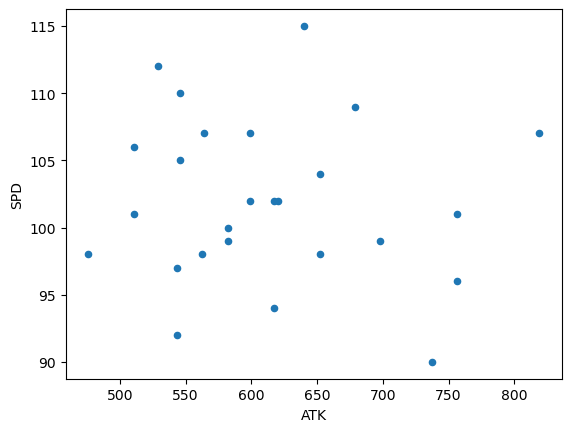

In [118]:
characters_df.plot.scatter(x='ATK', y='SPD')

<AxesSubplot:xlabel='HP', ylabel='ATK'>

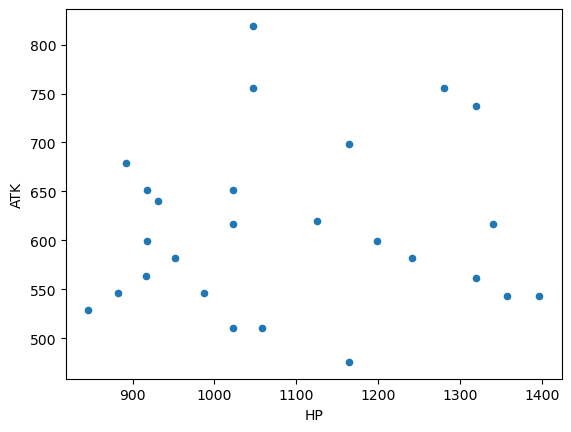

In [119]:
characters_df.plot.scatter(x='HP', y='ATK')

<AxesSubplot:xlabel='DEF', ylabel='SPD'>

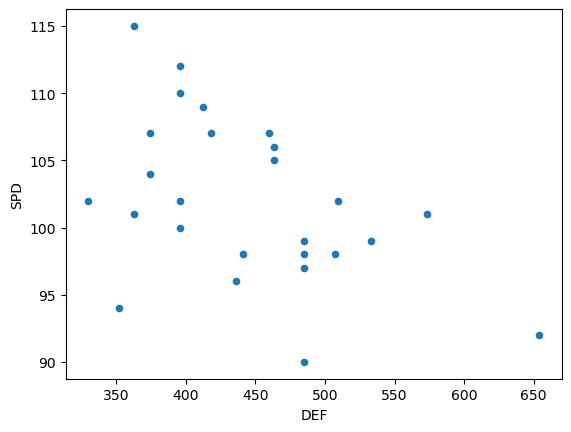

In [120]:
characters_df.plot.scatter(x='DEF', y='SPD')

Se puede observar que hay una alta correlacion entre SPD Y HP. Al ser mayor la velocidad de un personaje, menor es su cantidad de vida base. Al ser mayor su vida, su movimiento sera menor.

<AxesSubplot:xlabel='SPD', ylabel='HP'>

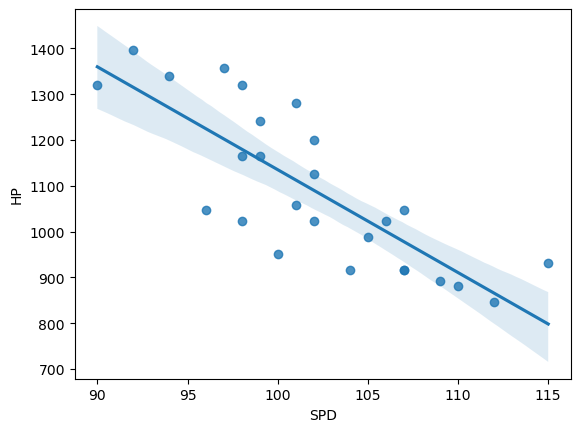

In [121]:
sns.regplot(x='SPD', y='HP', data=characters_df)

<AxesSubplot:xlabel='SPD', ylabel='HP'>

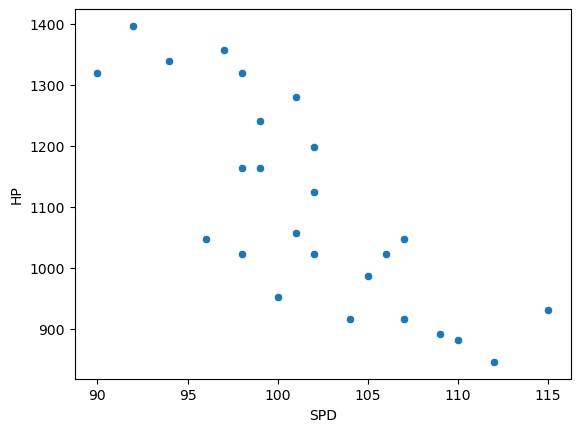

In [122]:
sns.scatterplot(x='SPD', y='HP', data=characters_df)

In [123]:
# Se agrega esta linea de codigo debido a que desde vsc no se puede visualizar los graficos, ignorar si se utiliza con jupyter notebook
#plt.show()

<AxesSubplot:xlabel='Combat Type', ylabel='count'>

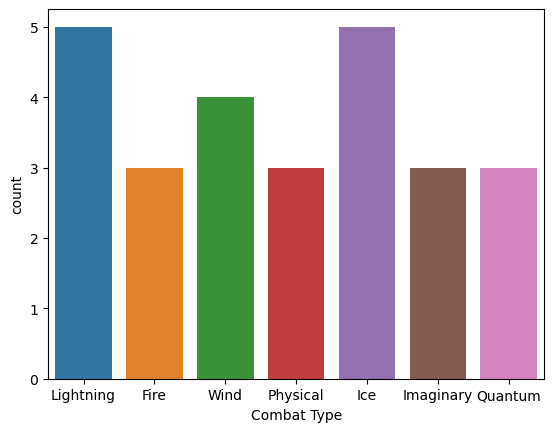

In [124]:
sns.countplot(x='Combat Type',
            data=characters_df[characters_df['Status'] == 'Playable']
             )

In [126]:
sns.countplot(x='Combat Type',
            data=characters_df[characters_df['Status'] == 'Upcoming']
             )

ValueError: min() arg is an empty sequence